In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Show dataset shapes
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Train labels shape:", y_train.shape)


Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Train labels shape: (50000, 1)


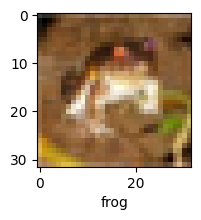

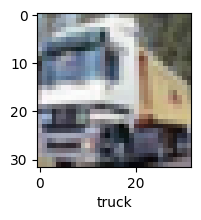

In [3]:
# Cell 2: Reshape labels, set class names, and define plot function

# Flatten labels from shape (n,1) to shape (n,)
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# CIFAR-10 class names
classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Function to plot a sample image with label
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

# Show two sample images
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 1)


In [ ]:
# Cell 3: Normalize data and build ANN model

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build ANN model
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile ANN
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train ANN
ann.fit(X_train, y_train, epochs=5)

In [5]:
# Cell 4: Evaluate ANN model and show classification report

from sklearn.metrics import confusion_matrix, classification_report

# Predict with ANN
y_pred = ann.predict(X_test)

# Convert predictions to class labels
y_pred_classes = [np.argmax(element) for element in y_pred]

# Print classification report
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.51      0.51      1000
           1       0.47      0.70      0.56      1000
           2       0.39      0.28      0.32      1000
           3       0.45      0.14      0.21      1000
           4       0.33      0.59      0.42      1000
           5       0.42      0.37      0.39      1000
           6       0.63      0.35      0.45      1000
           7       0.69      0.36      0.47      1000
           8       0.39      0.83      0.53      1000
           9       0.55      0.32      0.41      1000

    accuracy                           0.45     10000
   macro avg       0.48      0.45      0.43     10000
weighted avg       0.48      0.45      0.43     10000



In [ ]:
# Cell 5: Build and train CNN model

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

In [7]:
# Cell 6: Evaluate CNN model and make predictions

# Evaluate the CNN on test data
cnn.evaluate(X_test, y_test)

# Predict with CNN
y_pred = cnn.predict(X_test)

# Convert predictions to class labels
y_classes = [np.argmax(element) for element in y_pred]

# Show first 5 predicted classes
y_classes[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7011 - loss: 0.9360
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


[3, 8, 0, 0, 6]

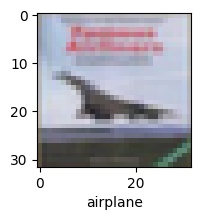

Predicted label: airplane


In [8]:
# Cell 7: Compare predictions with actual labels

# Show first 5 actual labels
y_test[:5]

# Plot a sample image from the test set with its predicted label
plot_sample(X_test, y_test, 3)
print("Predicted label:", classes[y_classes[3]])

In [9]:
# Cell 8: CNN classification report & confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

print("CNN Classification Report:\n", classification_report(y_test, y_classes))
print("CNN Confusion Matrix:\n", confusion_matrix(y_test, y_classes))

CNN Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      1000
           1       0.85      0.77      0.81      1000
           2       0.60      0.61      0.60      1000
           3       0.47      0.57      0.52      1000
           4       0.63      0.65      0.64      1000
           5       0.68      0.54      0.60      1000
           6       0.74      0.81      0.77      1000
           7       0.70      0.76      0.73      1000
           8       0.84      0.78      0.81      1000
           9       0.84      0.73      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

CNN Confusion Matrix:
 [[770  11  51  34  24   4  11  23  48  24]
 [ 42 774  17  25   8   2  18  12  27  75]
 [ 68   6 606  79  91  41  56  37  12   4]
 [ 15   5  65 575  83 121  73  45  12   6]
 [ 20   4  63  75 

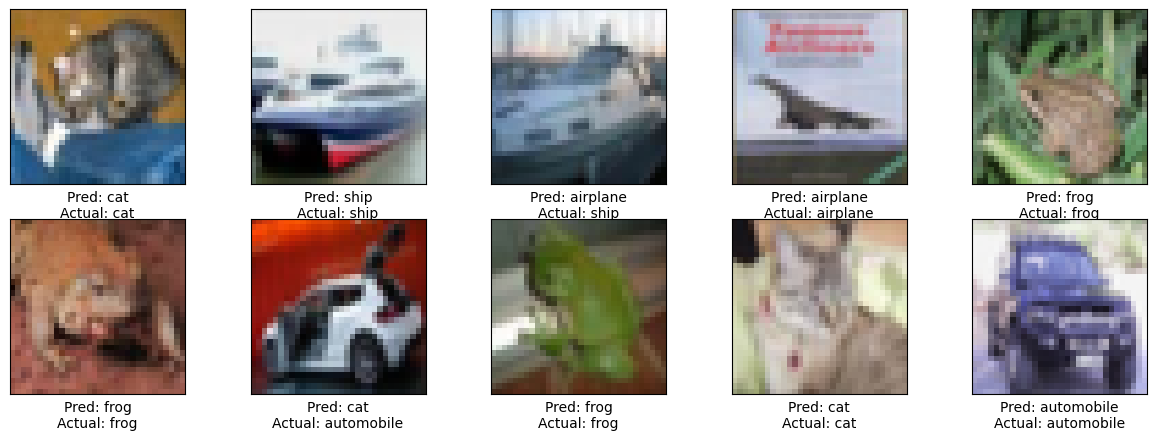

In [10]:
# Cell 9: Show a few test images with predicted labels
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"Pred: {classes[y_classes[i]]}\nActual: {classes[y_test[i]]}")
plt.show()

In [11]:
# Cell 10: Save ANN and CNN models
ann.save("ann_cifar10_model.h5")
cnn.save("cnn_cifar10_model.h5")

print("Models saved successfully.")

Models saved successfully.
